In [1]:
import os
from os.path import isfile, join

import re

import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
path = '../data/graphs/kw33/results'

def build_df_from_csvs(path: str) -> pd.DataFrame:
    files = os.listdir(path)
    df = pd.DataFrame()

    for current_file in files:
    # current_file = files[0]
        df_tmp = pd.read_csv(join(path, current_file), delimiter=',\t')
        
        prefix = [re.findall(r'(\w+?)(\d+\.\d+|\d+)', identifier)[0] for identifier in current_file.split('-')[0].split('_')]
        for cn, cv in prefix:
            df_tmp[cn] = pd.to_numeric(cv)

        suffix = current_file.split('-')[2].split('_')
        if len(suffix) == 3:
            suffix[1] = '{}_{}'.format(suffix[1], suffix[2])
            suffix.pop(2)
        suffix[1] = suffix[1].split('.')[0]
        df_tmp['Sampling'] = suffix[0]
        df_tmp['Clustering'] = suffix[1]
        
        df = pd.concat([df, df_tmp])

    # postprocess
    df['jsd'] = df['jsd'].apply(lambda x: 1 - x)
    df.rename(columns = {'jsd':'ijsd'}, inplace = True)

    return df

df: pd.DataFrame = build_df_from_csvs(path)
df.head()

,Checkpoint,bootstrap_jsd,gambette,cluster_number,ijsd,ari,n,k,log,Sampling,Clustering
0,10,0.000000,0.994230,1,0.974538,1.000000,100,3,0.3,modifiedrandomwalk,cw
1,20,0.000000,0.978541,1,0.974538,1.000000,100,3,0.3,modifiedrandomwalk,cw
2,30,0.013543,0.976104,3,0.792277,0.000000,100,3,0.3,modifiedrandomwalk,cw
3,40,0.015185,0.956944,2,0.931105,-0.061798,100,3,0.3,modifiedrandomwalk,cw
4,50,0.025176,0.951358,3,0.845357,-0.034217,100,3,0.3,modifiedrandomwalk,cw


In [3]:
sns.set_theme(style="darkgrid")
checkpoints = [10, 20, 30, 40, 50, 100, 200, 300, 400, 500, 1000, 2000,  3000, 4000, 5000]

In [4]:
df_dwug: pd.DataFrame = df.query('Clustering in ["cw", "cc_nosplit", "cc_split"] and Sampling == "dwug"')
df_dwug.head()

,Checkpoint,bootstrap_jsd,gambette,cluster_number,ijsd,ari,n,k,log,Sampling,Clustering
0,10,0.027878,0.980834,3,0.933642,0.146341,100,3,0.9,dwug,cw
1,20,0.051534,0.970613,6,0.789079,0.248959,100,3,0.9,dwug,cw
2,30,0.050890,0.937415,6,0.783126,0.380697,100,3,0.9,dwug,cw
3,40,0.049317,0.801103,4,0.945318,0.931272,100,3,0.9,dwug,cw
4,50,0.030856,0.735032,5,0.907632,0.520317,100,3,0.9,dwug,cw


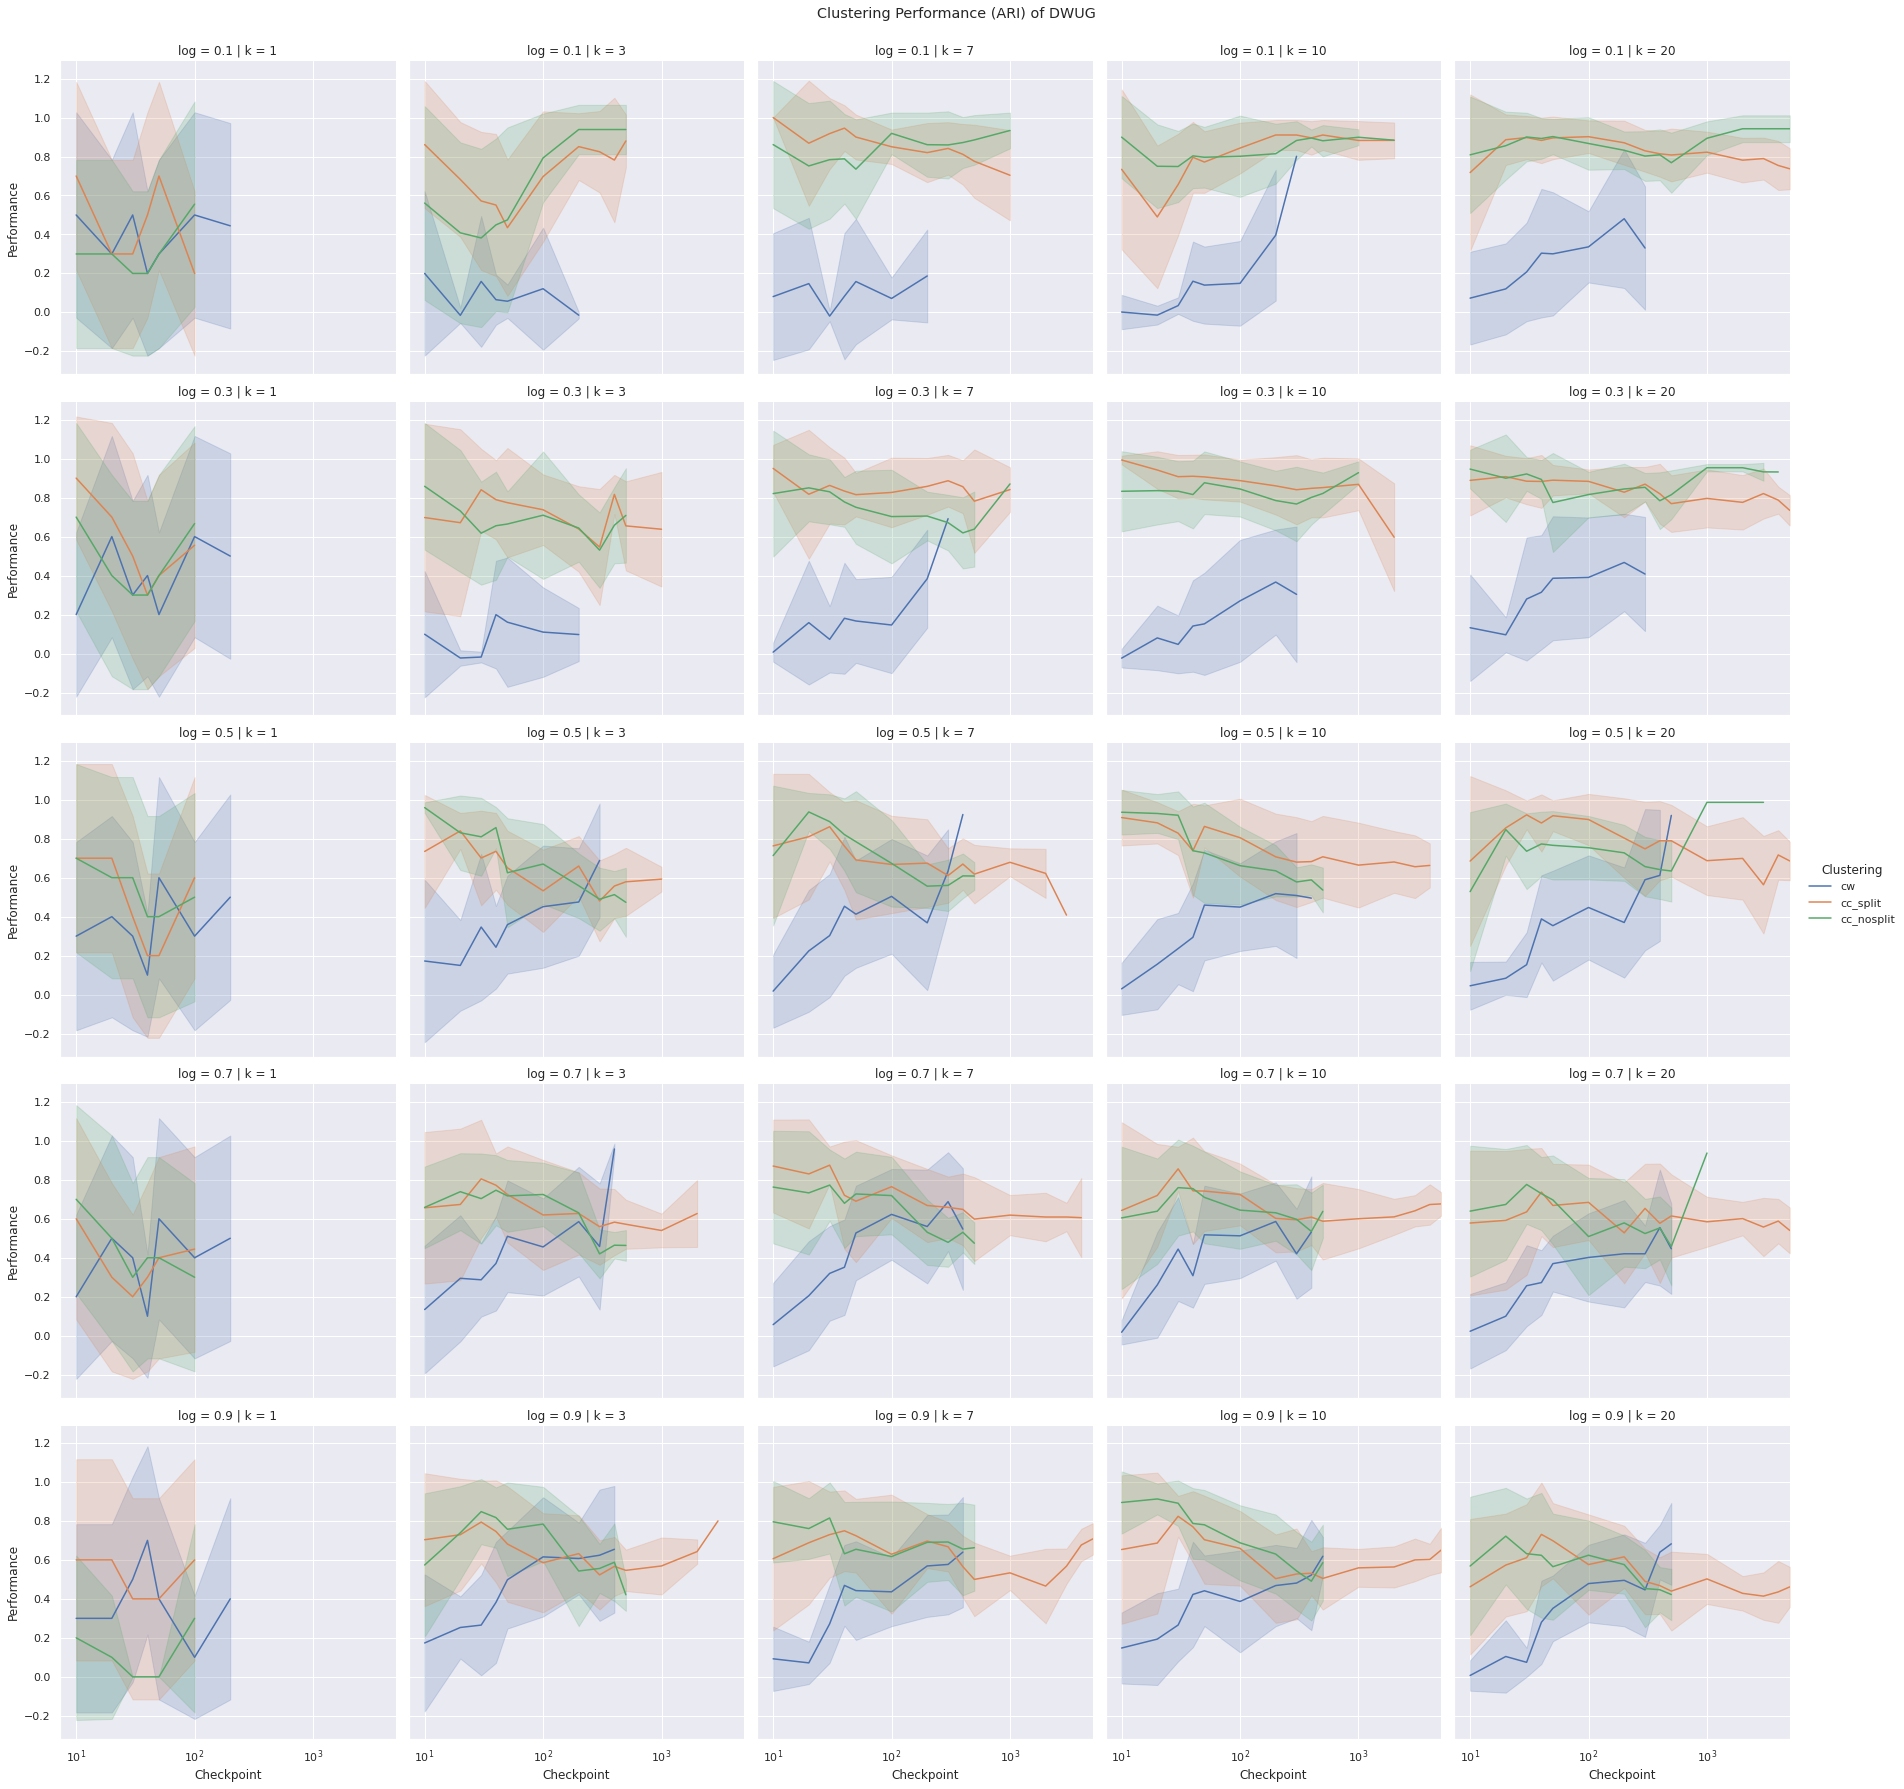

In [6]:
df_dwug_melted = pd.melt(df_dwug, id_vars=['Checkpoint', 'Clustering', 'log', 'k'], value_vars=['ari'], var_name='Measure', value_name='Performance')
rp = sns.relplot(data=df_dwug_melted,
    x='Checkpoint', y='Performance', hue='Clustering', col='k', row='log', ci='sd', kind='line')

rp.fig.subplots_adjust(top=0.95)
rp.fig.suptitle('Clustering Performance (ARI) of DWUG')
rp.set(xscale='log')
rp.set(xlim=[0, 5000])

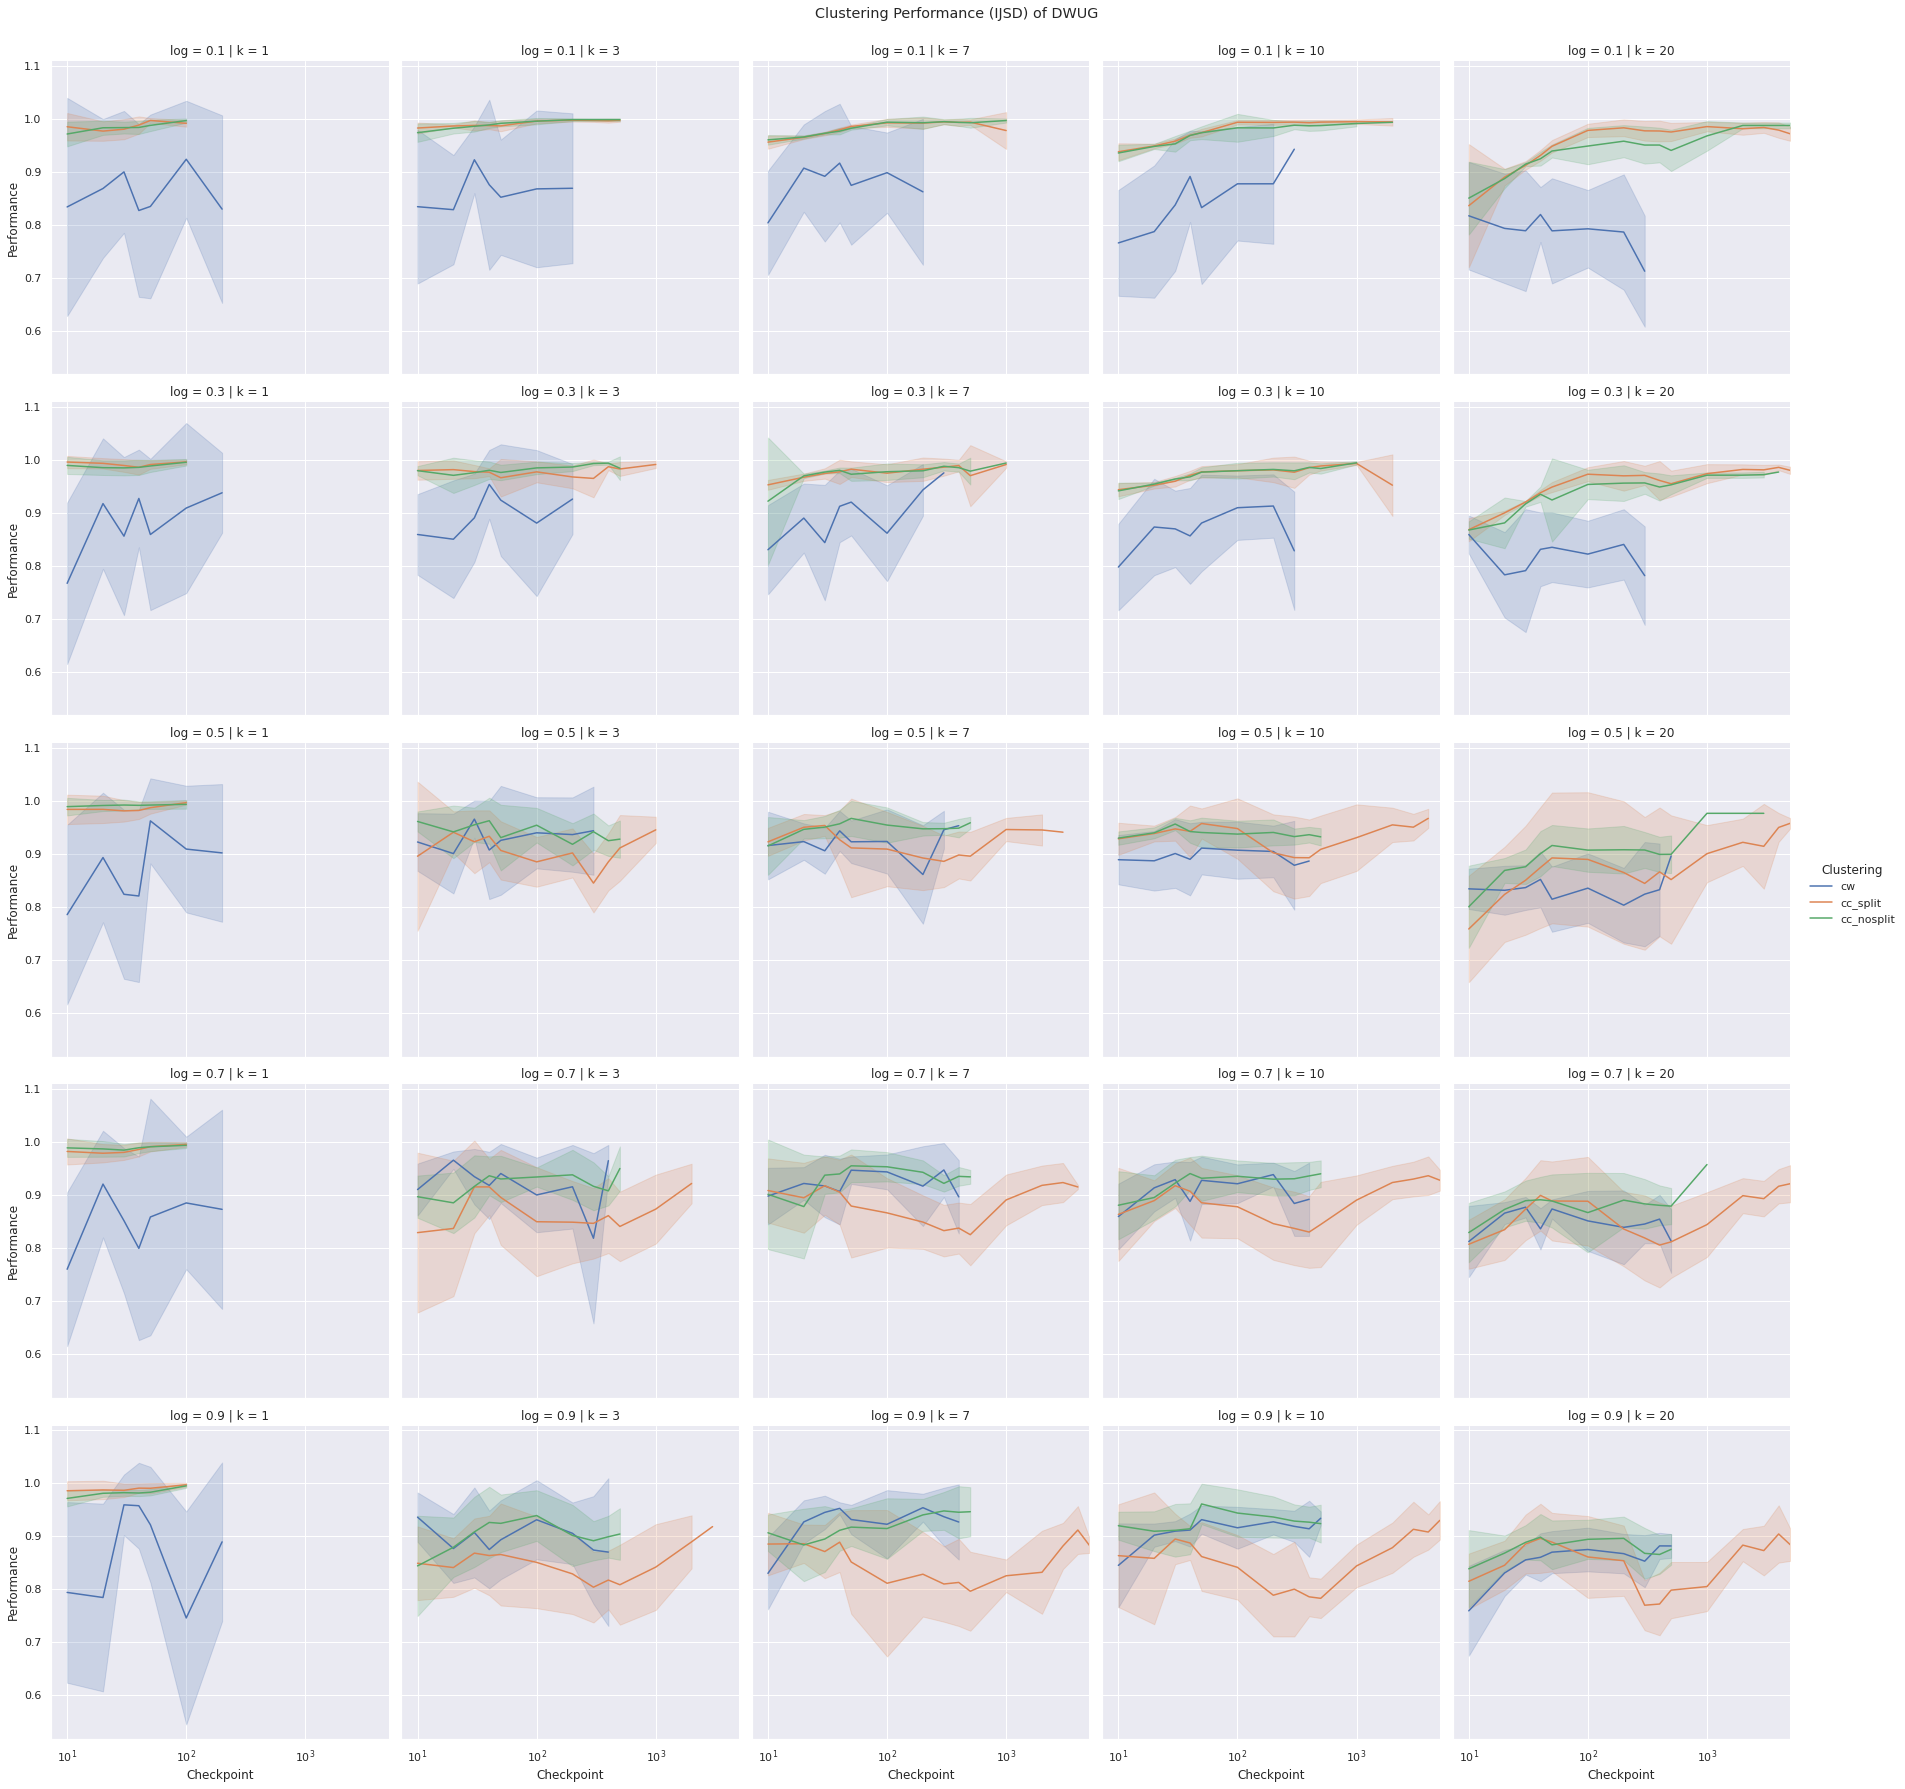

In [7]:
df_dwug_melted = pd.melt(df_dwug, id_vars=['Checkpoint', 'Clustering', 'log', 'k'], value_vars=['ijsd'], var_name='Measure', value_name='Performance')
rp = sns.relplot(data=df_dwug_melted,
    x='Checkpoint', y='Performance', hue='Clustering', col='k', row='log', ci='sd', kind='line')

rp.fig.subplots_adjust(top=0.95)
rp.fig.suptitle('Clustering Performance (IJSD) of DWUG')
rp.set(xscale='log')
rp.set(xlim=[0, 5000])

In [8]:
df_dwug: pd.DataFrame = df.query('Sampling == "dwug" and k == 1')
df_dwug.head()

,Checkpoint,bootstrap_jsd,gambette,cluster_number,ijsd,ari,n,k,log,Sampling,Clustering
0,10,0.022999,0.977539,3,0.604184,0.0,100,1,0.1,dwug,cw
1,20,0.015061,0.894390,2,0.958797,0.0,100,1,0.1,dwug,cw
2,30,0.000000,0.795497,1,1.000000,1.0,100,1,0.1,dwug,cw
3,40,0.025476,0.767747,3,0.837880,0.0,100,1,0.1,dwug,cw
4,50,0.009920,0.518055,2,0.972176,0.0,100,1,0.1,dwug,cw


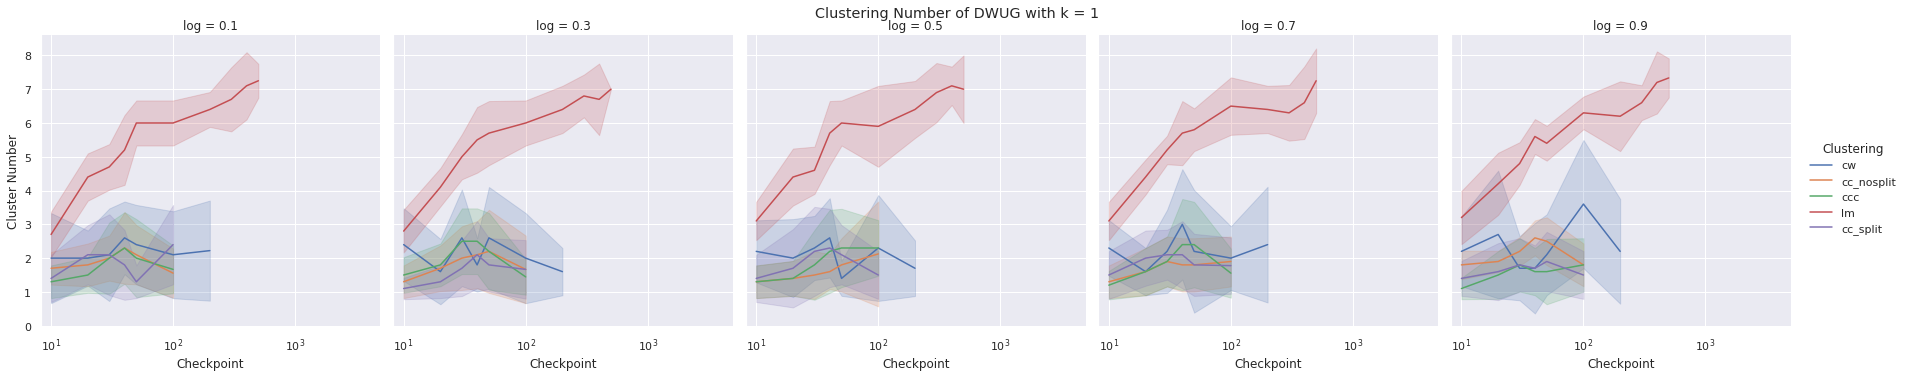

In [12]:
df_dwug_melted = pd.melt(df_dwug, id_vars=['Checkpoint', 'Clustering', 'log'], value_vars=['cluster_number'], var_name='Measure', value_name='Cluster Number')
rp = sns.relplot(data=df_dwug_melted,
    x='Checkpoint', y='Cluster Number', hue='Clustering', col='log', ci='sd', kind='line')

rp.fig.subplots_adjust(top=0.9)
rp.fig.suptitle('Clustering Number of DWUG with k = 1')
rp.set(xscale='log')
rp.set(xlim=[0, 5000])

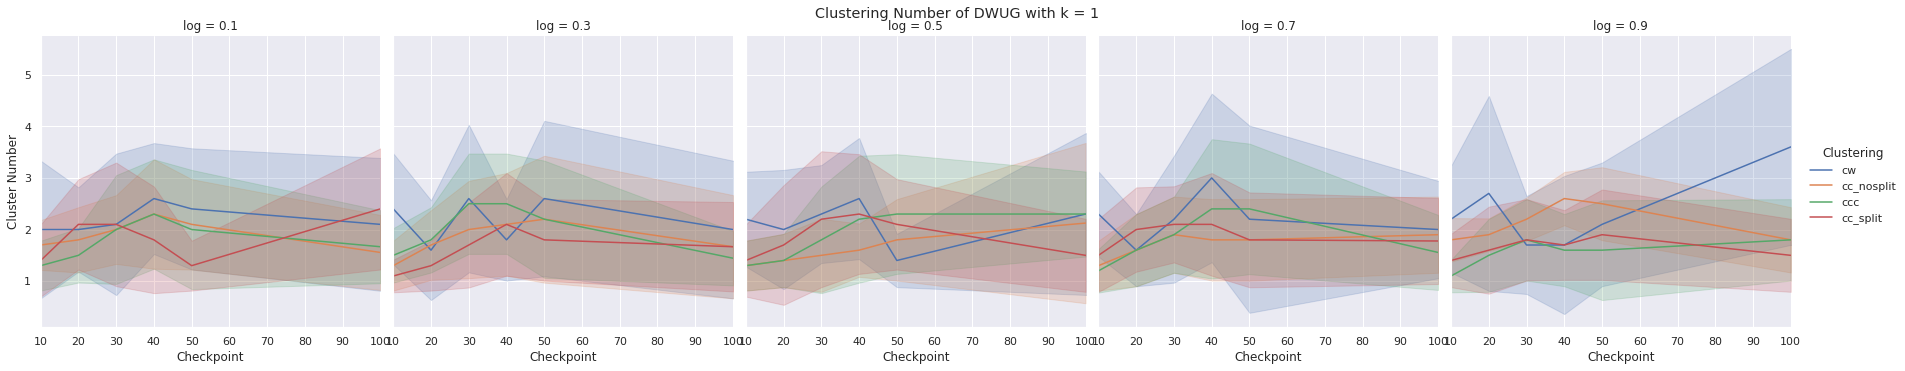

In [14]:
df_dwug: pd.DataFrame = df.query('Sampling == "dwug" and k == 1 and Clustering != "lm"')
df_dwug_melted = pd.melt(df_dwug, id_vars=['Checkpoint', 'Clustering', 'log'], value_vars=['cluster_number'], var_name='Measure', value_name='Cluster Number')
rp = sns.relplot(data=df_dwug_melted,
    x='Checkpoint', y='Cluster Number', hue='Clustering', col='log', ci='sd', kind='line')

rp.fig.subplots_adjust(top=0.9)
rp.fig.suptitle('Clustering Number of DWUG with k = 1')
rp.set(xscale='linear')
rp.set(xlim=[10, 100])